In [1]:
import sys
from pathlib import Path
import pickle
import numpy as np
import random
import kmedoids
import matplotsoccer
import matplotlib.pyplot as plt

ROOT = Path.cwd().parent 
sys.path.insert(0, str(ROOT))

import importlib
import playstyle_utils
importlib.reload(playstyle_utils)
from playstyle_utils import compute_dtw_distance_matrix, assign_to_nearest_medoids

DATA = ROOT / "data" / "derived"

with open(DATA / "movement_chain_coords.pkl", "rb") as f:
    movement_chain_coords = pickle.load(f)

with open(DATA / "match_movement_chains_coords.pkl", "rb") as f:
    match_movement_chains_coords = pickle.load(f)

with open(DATA / "match_movement_chains.pkl", "rb") as f:
    match_movement_chains = pickle.load(f)

In [2]:
random.seed(20)

sample_movement_chains = (random.sample(movement_chain_coords, k = 20000))

In [3]:
distance_matrix = compute_dtw_distance_matrix(sample_movement_chains)

Processing trajectory 0/20000
Processing trajectory 5000/20000
Processing trajectory 10000/20000
Processing trajectory 15000/20000


In [4]:
medoid_indices = kmedoids.fastpam1(distance_matrix, 70, init="build")

In [5]:
clusters = {}
for cluster_nmbr in range(1, 70):
    cluster_trajectories = []
    for idx, i in enumerate(medoid_indices.labels):
        if cluster_nmbr == i:
            cluster_trajectories.append(sample_movement_chains[idx])
    clusters[cluster_nmbr] = cluster_trajectories

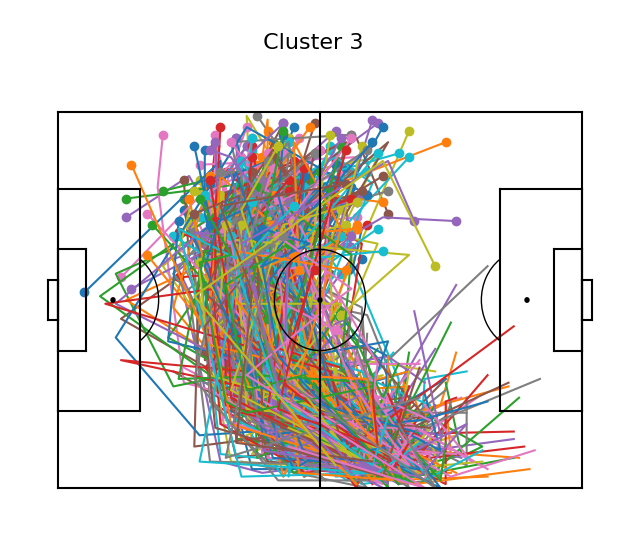

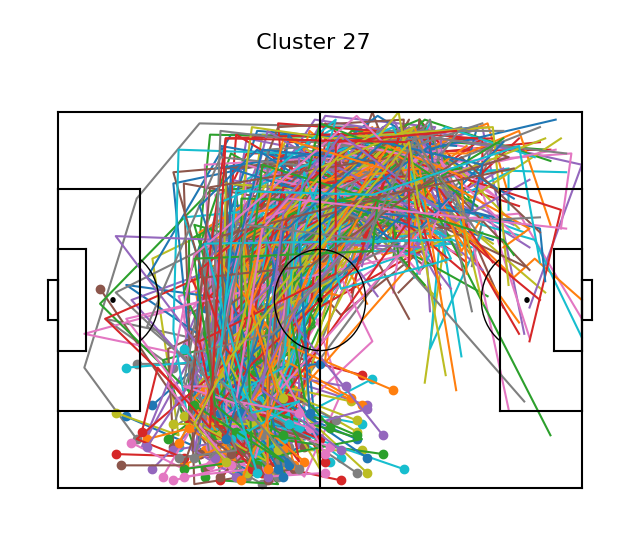

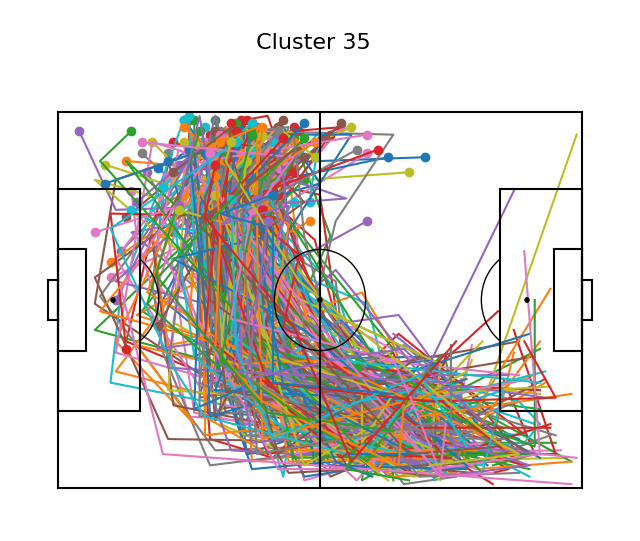

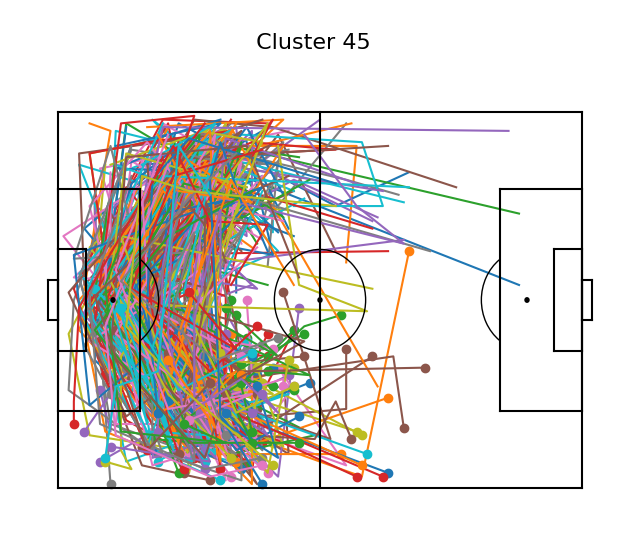

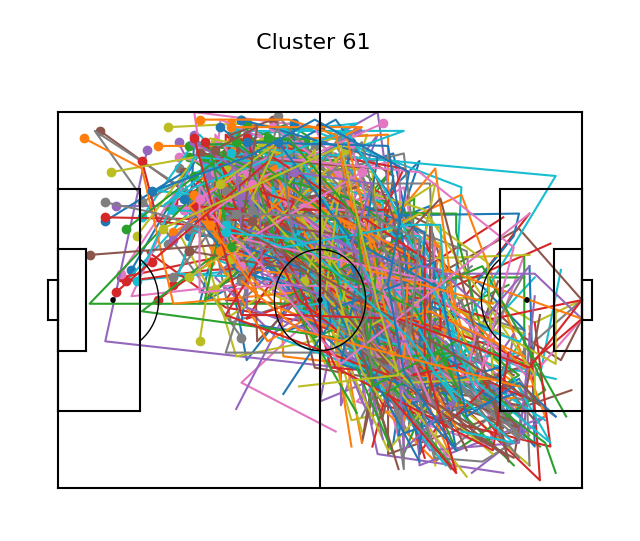

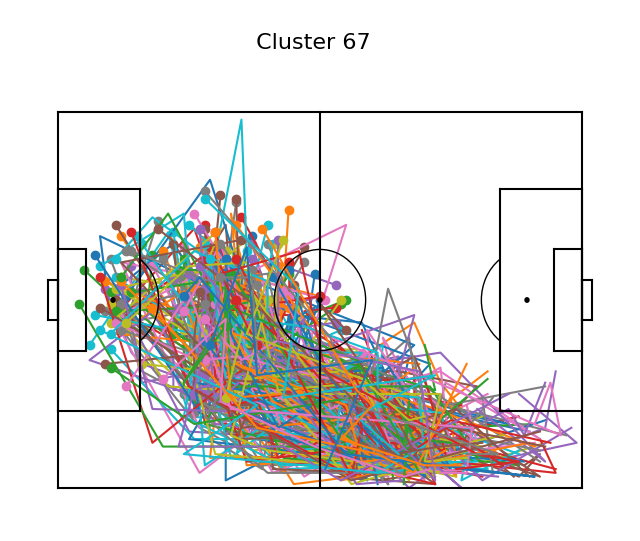

In [6]:
selected_clusters = {3, 27, 35, 45, 61, 67}

for cluster in clusters:
    if cluster not in selected_clusters:
        continue
    
    matplotsoccer.field("white",figsize=8, show=False) 
    for trajec in clusters[cluster]:
        start, = plt.plot(trajec[0][0]*105,trajec[0][1]*68,"o")
        if cluster in (3, 27, 35, 45, 61, 67):
            plt.suptitle(f"\n Cluster {cluster}", fontsize=16)
            plt.plot(trajec[:, 0]*105, trajec[:, 1]*68, color = start.get_color())
    continue

In [ ]:
medoid_trajs = [sample_movement_chains[m] for m in medoid_indices.medoids]

movement_chain_clusters = assign_to_nearest_medoids(medoid_indices.medoids, medoid_trajs, match_movement_chains_coords)

In [ ]:
movement_chain_clusters

In [8]:
OUT = ROOT / "data" / "derived"
OUT.mkdir(parents=True, exist_ok=True)

with open(OUT / "movement_chain_clusters.pkl", "wb") as f:
    pickle.dump(movement_chain_clusters, f)

with open(OUT / "sample_movement_chains.pkl", "wb") as f:
    pickle.dump(sample_movement_chains, f)